# Wrong-sign data analysis

The goal of this notebook is to evaluate the performance of the wrong-sign data to model the combinatorial background.

In [1]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data
import plot.histogram as h
from plot.tool import save_file

from matplotlib import rc
rc('text', usetex=True)

Welcome to JupyROOT 6.22/02


## Load data with cut on $\Delta M$

In [12]:
variables = []

for particle in ['B0']:
    variables.append(f"{particle}_M")

for particle in ['B0', 'Dst', 'tau_pion0', 'tau_pion1', 'tau_pion2']:
    variables.append(f"{particle}_P")
    variables.append(f"{particle}_PT")

for particle in ['B0', 'Dst', 'tau']:
    variables.append(f"{particle}_ENDVERTEX_CHI2")

        
for particle in ['tau_pion0', 'tau_pion1', 'tau_pion2']:
    variables.append(f"{particle}_TRACK_CHI2NDOF")


In [9]:
df = {}
df['common'] = load_data(years,magnets,type_data = 'common'  ,vars = variables, cut_DeltaM=True, cut_PIDK=None)
df['MC']     = load_data(years,magnets,type_data = 'MC'      ,vars = variables, cut_DeltaM=True, cut_PIDK=None)
df['ws']     = load_data(years,magnets,type_data = 'ws_strip',vars = variables, cut_DeltaM=True, cut_PIDK=None)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_down.root
cut on DeltaM has removed 425088 over 935261 events
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root
cut on DeltaM has removed 0 over 23724 events
/eos/lhcb/

In [16]:
len(df['ws'])

1841296

## Background sample

In [10]:
low_bkg = 5355
high_bkg = 5570

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_data_highmasscut.pdf


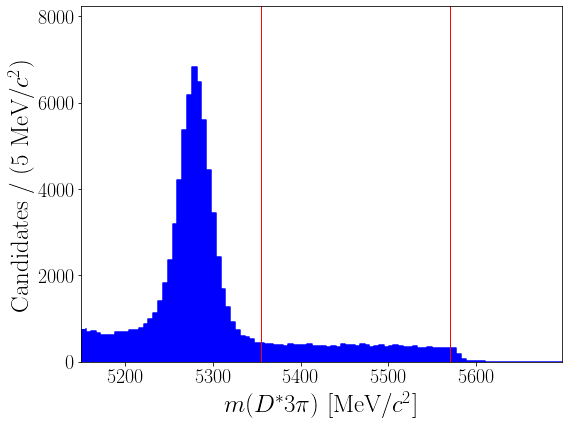

In [21]:
fig, ax = h.plot_hist_particle({'data':df['common']},'B0_M',
              n_bins = 100, mode_hist = True, colors=['b'], low=5150, save_fig=False)
ax.axvline(x=low_bkg, color='red', linewidth=1.)
ax.axvline(x=high_bkg, color='red', linewidth=1.)
save_file(fig, 'B0_M_data_highmasscut')

In [14]:
df['common_highB0_M'] = df['common'].query(f"B0_M > {low_bkg} and B0_M < {high_bkg}")
#df['ws_highB0_M'] = df['ws'].query(f"B0_M > {low_bkg} and B0_M < {high_bkg}")

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_data.pdf
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_M_data.pdf


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*$) [MeV/$c^2$]', ylabel='Candidates / (0.8 MeV/$c^2$)'>)

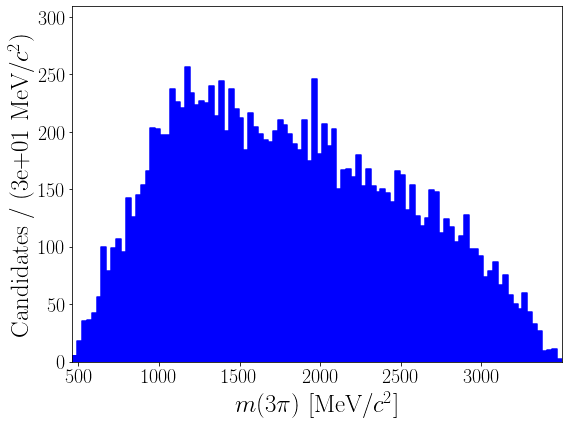

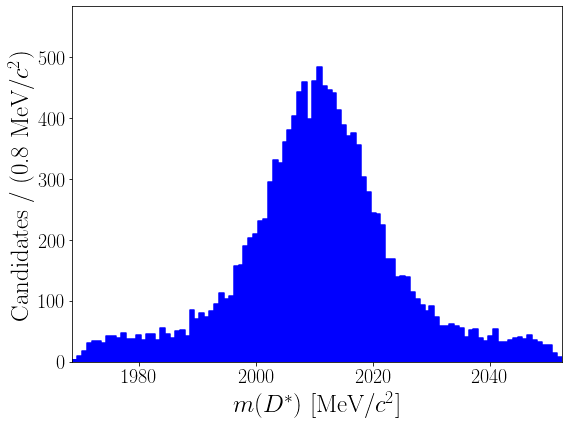

In [8]:
h.plot_hist_particle({'data':df['common_highB0_M']},'tau_M',
              n_bins = 100, mode_hist = True, colors=['b'])
h.plot_hist_particle({'data':df['common_highB0_M']},'Dst_M',
              n_bins = 100, mode_hist = True, colors=['b'])

## `ws`, `common` and `MC` data comparison

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_wrong_sign_MC_data.pdf


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Proportion of candidates / (4 MeV/$c^2$)'>)

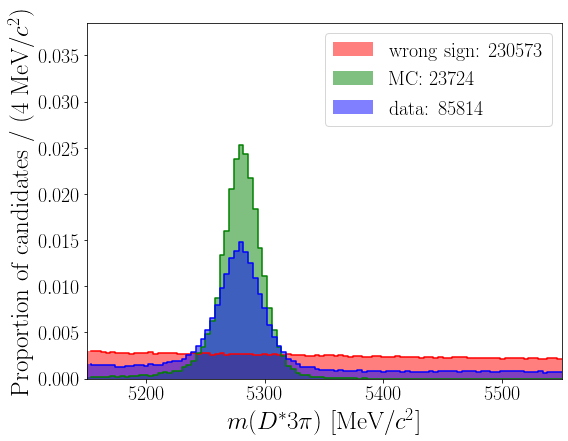

In [23]:
low = 5150
high = 5550
h.plot_hist_particle({'wrong sign': df['ws'], 'MC':df['MC'], 'data':df['common']},'B0_M',
              n_bins = 100, mode_hist = True, colors=['r', 'g', 'b'], low=low, high=high)

## `ws` vs `B0_M` at high mass

In [24]:
low = 5355
high = 5570

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_wrong_sign_data.pdf


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Proportion of candidates / (6 MeV/$c^2$)'>)

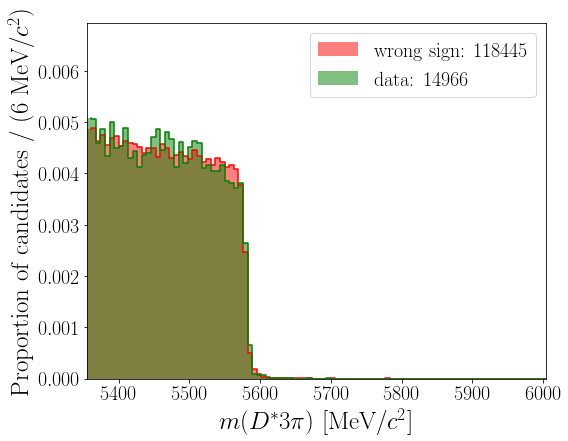

In [25]:
h.plot_hist_particle({'wrong sign': df['ws'], 'data': df['common']}, 'B0_M',
              n_bins = 100, mode_hist = True, colors=['r', 'g', 'b'], low=low)

We see that the `common` data with `5355 < B0_M < 5550.` is a good background candidate

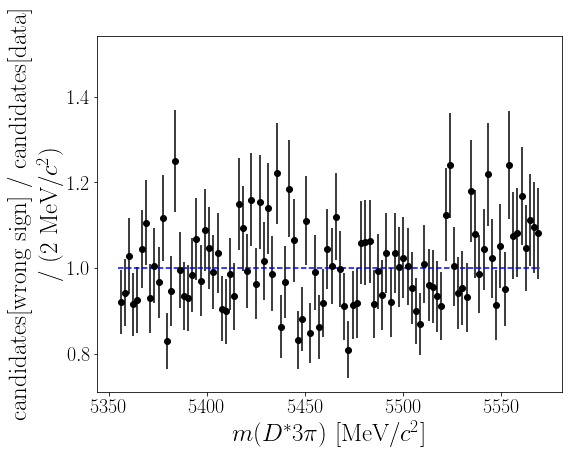

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/B0_M_wrong_sign_d_data.pdf


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='candidates[wrong sign] / candidates[data] \n / (2 MeV/$c^2$)'>)

In [26]:
h.plot_divide_particle({'wrong sign': df['ws'], 'data': df['common']}, 'B0_M',
              n_bins = 100, low=low, high=high)

In [27]:
print(variables)

['B0_M', 'B0_P', 'B0_PT', 'Dst_P', 'Dst_PT', 'tau_pion0_P', 'tau_pion0_PT', 'tau_pion1_P', 'tau_pion1_PT', 'tau_pion2_P', 'tau_pion2_PT', 'B0_ENDVERTEX_CHI2', 'Dst_ENDVERTEX_CHI2', 'tau_ENDVERTEX_CHI2', 'tau_pion0_TRACK_CHI2NDOF', 'tau_pion1_TRACK_CHI2NDOF', 'tau_pion2_TRACK_CHI2NDOF']


=====================  B0_M =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_wrong_sign_data.pdf


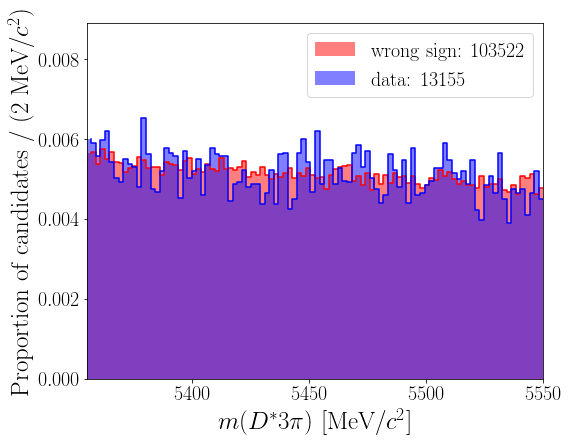

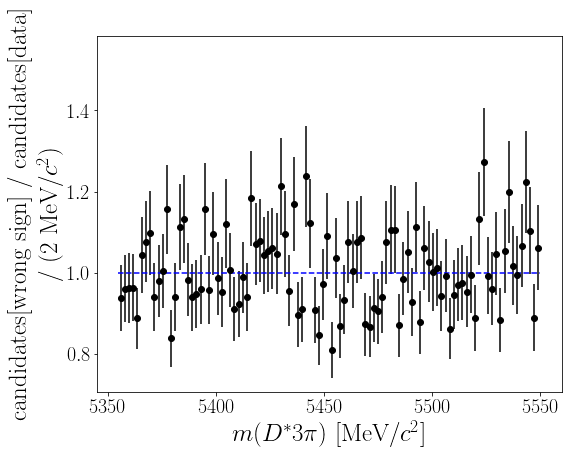

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/B0_M_wrong_sign_d_data.pdf
=====================  B0_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_P_wrong_sign_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


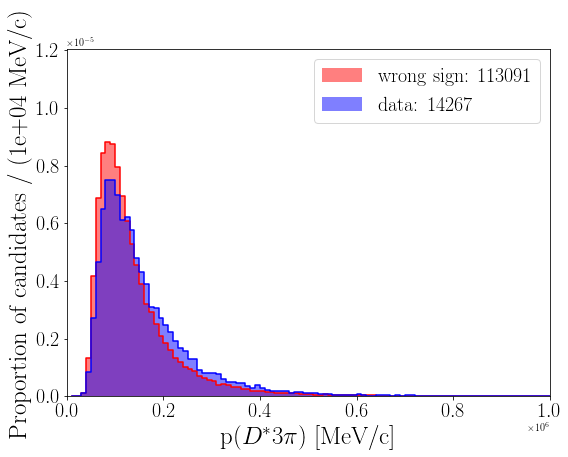

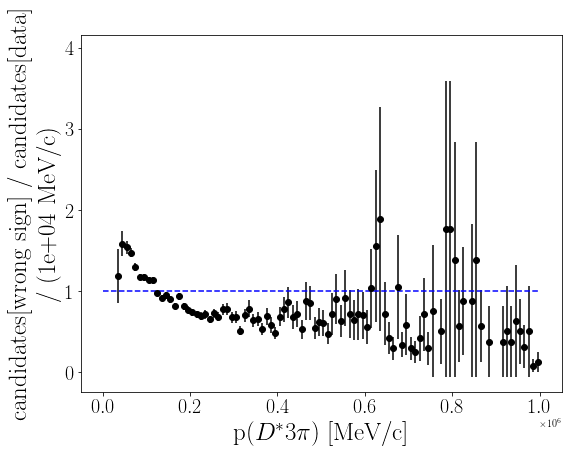

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/B0_P_wrong_sign_d_data.pdf
=====================  B0_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_PT_wrong_sign_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


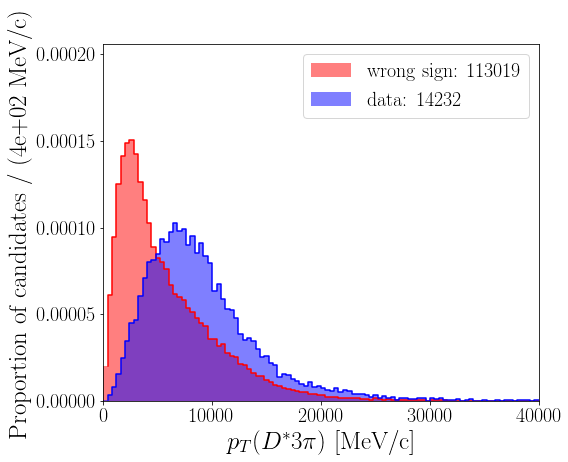

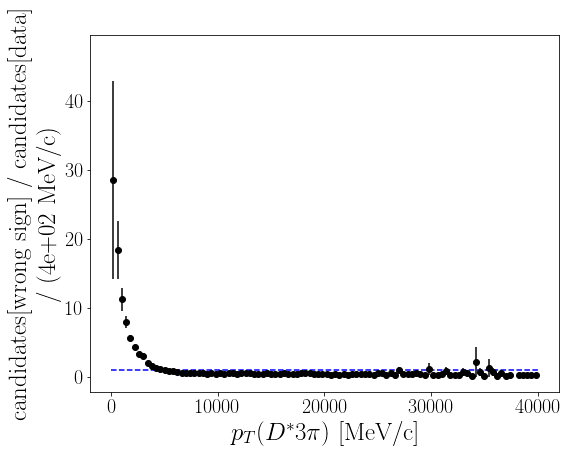

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/B0_PT_wrong_sign_d_data.pdf
=====================  Dst_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_P_wrong_sign_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


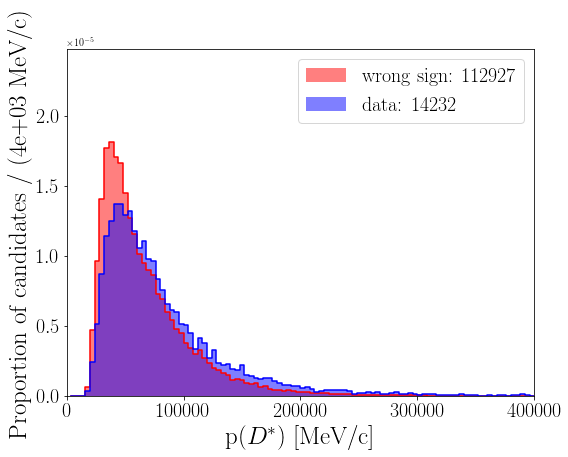

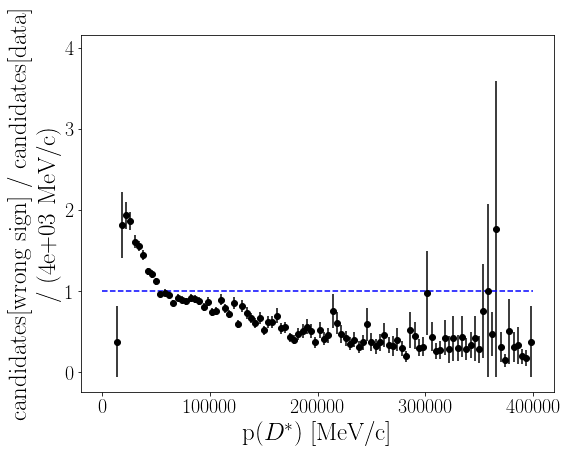

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/Dst_P_wrong_sign_d_data.pdf
=====================  Dst_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_PT_wrong_sign_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


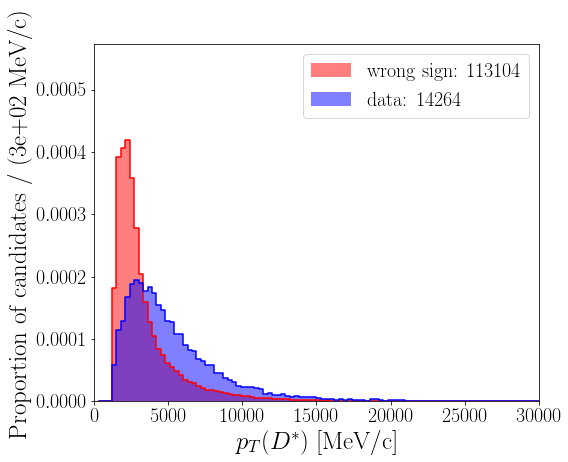

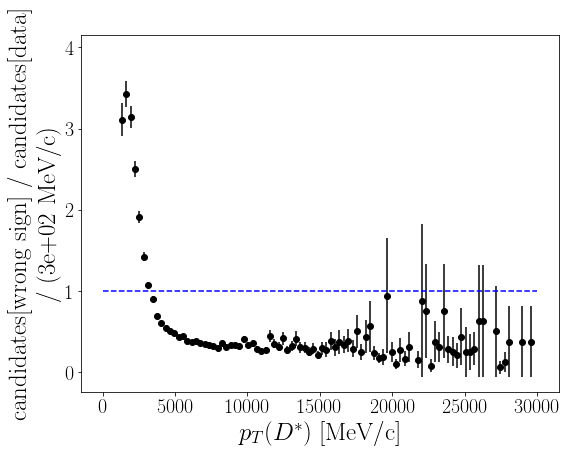

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/Dst_PT_wrong_sign_d_data.pdf
=====================  tau_pion0_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion0_P_wrong_sign_data.pdf


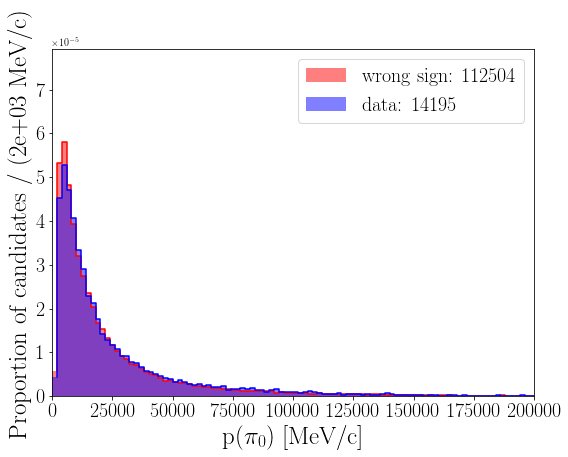

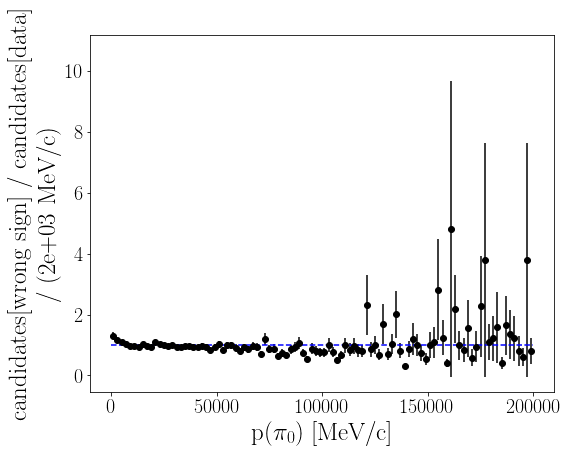

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_pion0_P_wrong_sign_d_data.pdf
=====================  tau_pion0_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion0_PT_wrong_sign_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


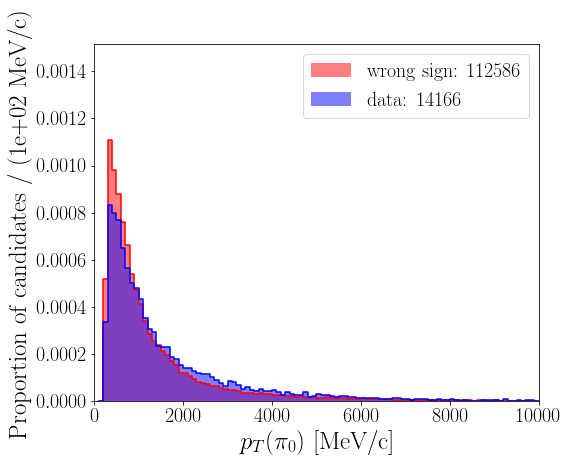

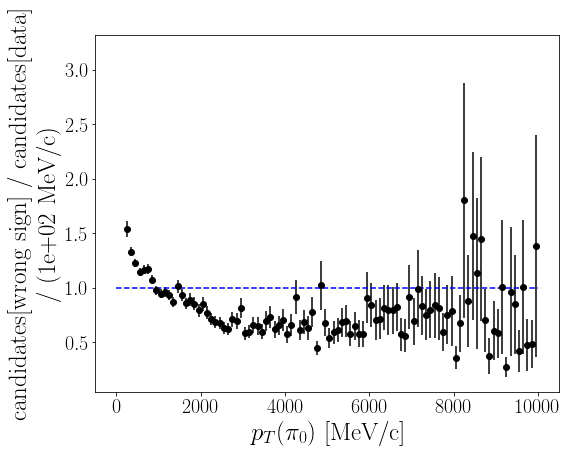

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_pion0_PT_wrong_sign_d_data.pdf
=====================  tau_pion1_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion1_P_wrong_sign_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


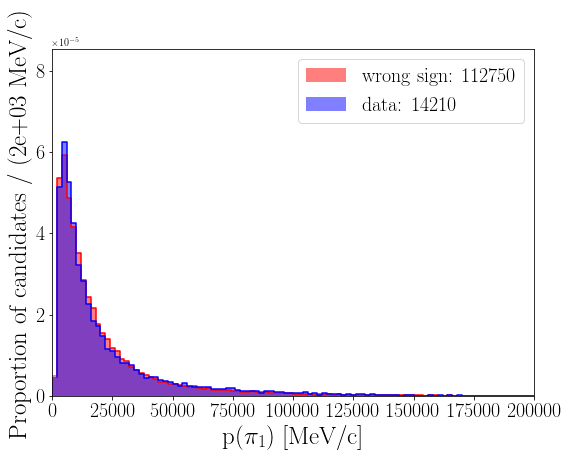

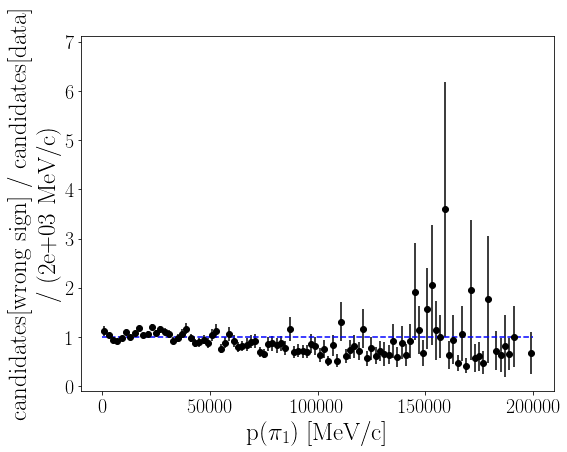

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_pion1_P_wrong_sign_d_data.pdf
=====================  tau_pion1_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion1_PT_wrong_sign_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


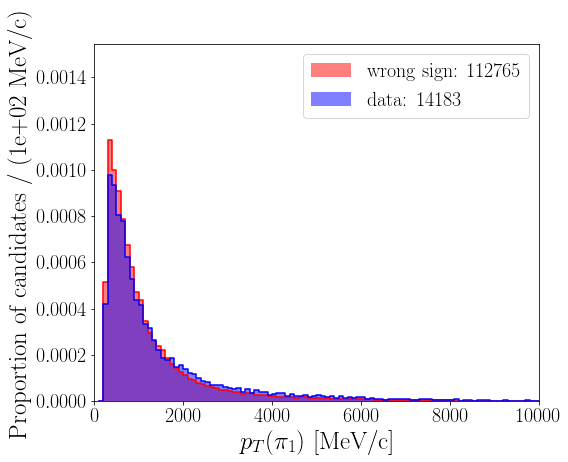

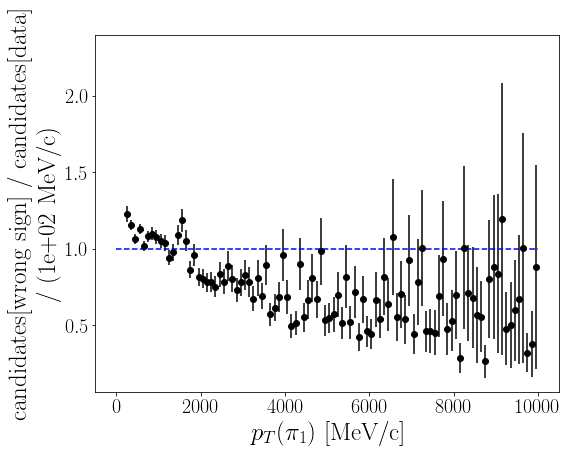

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_pion1_PT_wrong_sign_d_data.pdf
=====================  tau_pion2_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion2_P_wrong_sign_data.pdf


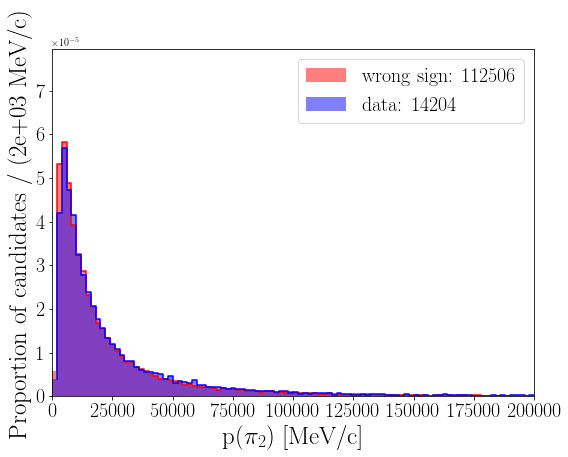

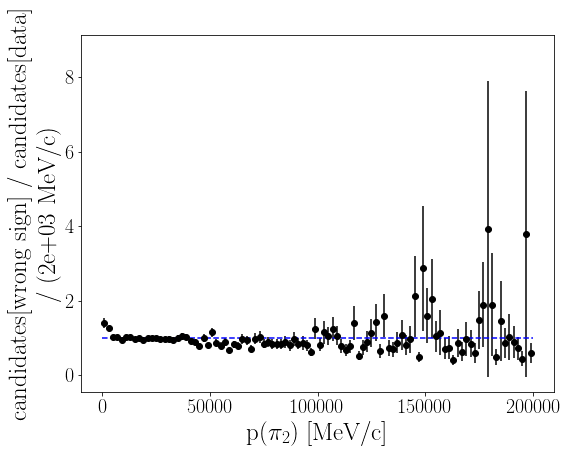

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_pion2_P_wrong_sign_d_data.pdf
=====================  tau_pion2_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion2_PT_wrong_sign_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


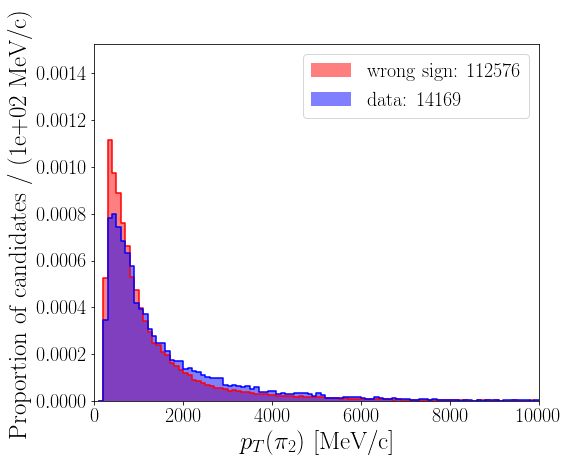

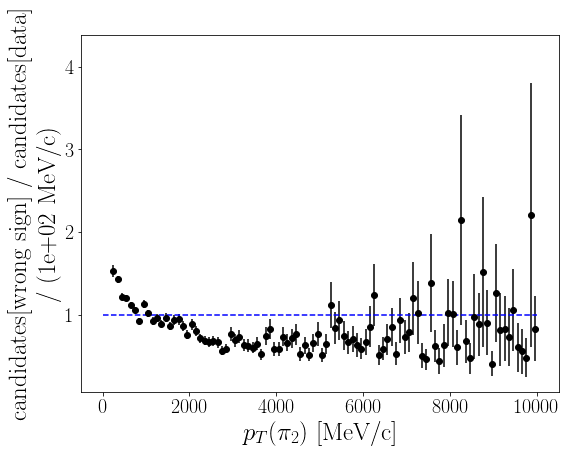

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_pion2_PT_wrong_sign_d_data.pdf
=====================  B0_ENDVERTEX_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_ENDVERTEX_CHI2_wrong_sign_data.pdf


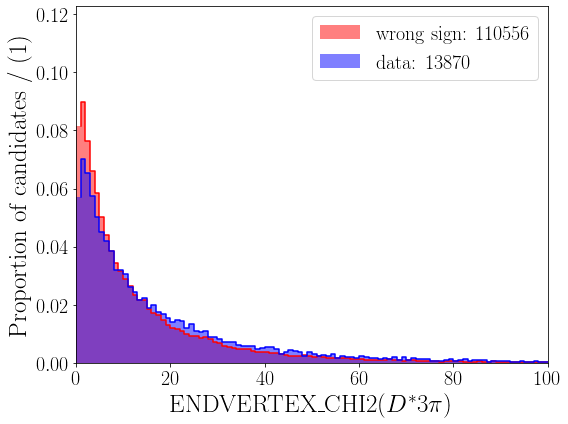

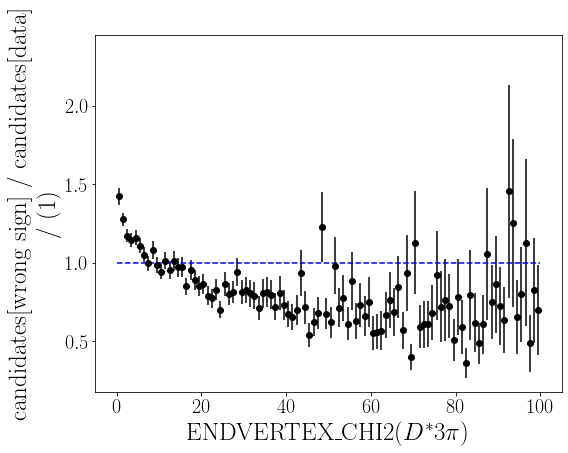

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/B0_ENDVERTEX_CHI2_wrong_sign_d_data.pdf
=====================  Dst_ENDVERTEX_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_ENDVERTEX_CHI2_wrong_sign_data.pdf


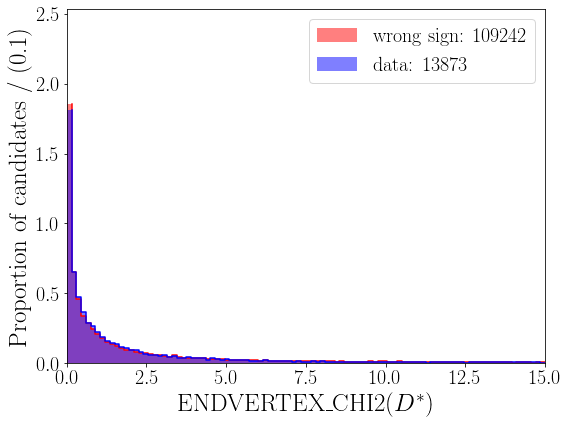

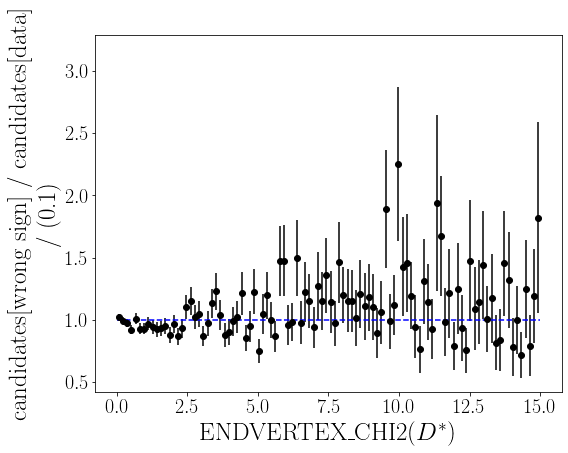

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/Dst_ENDVERTEX_CHI2_wrong_sign_d_data.pdf
=====================  tau_ENDVERTEX_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_ENDVERTEX_CHI2_wrong_sign_data.pdf


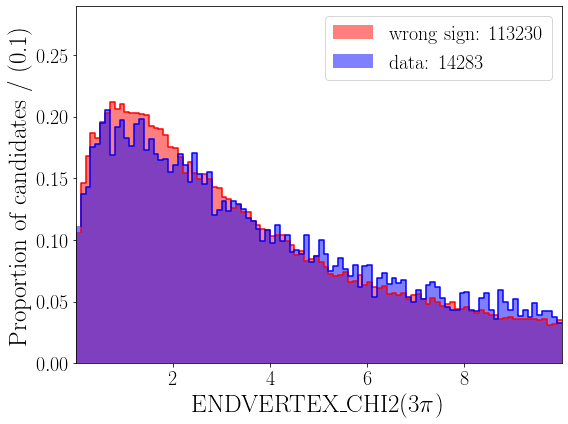

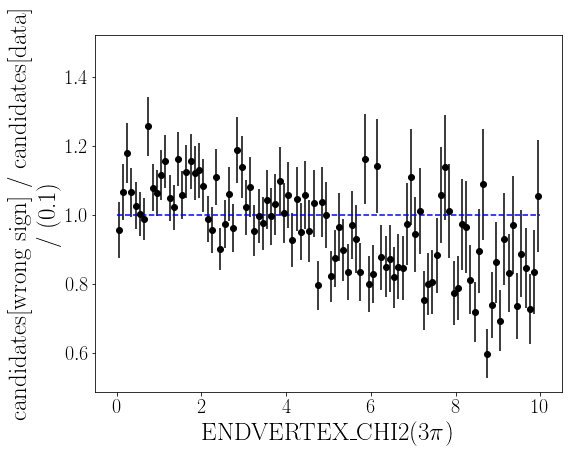

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_ENDVERTEX_CHI2_wrong_sign_d_data.pdf
=====================  tau_pion0_TRACK_CHI2NDOF =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion0_TRACK_CHI2NDOF_wrong_sign_data.pdf


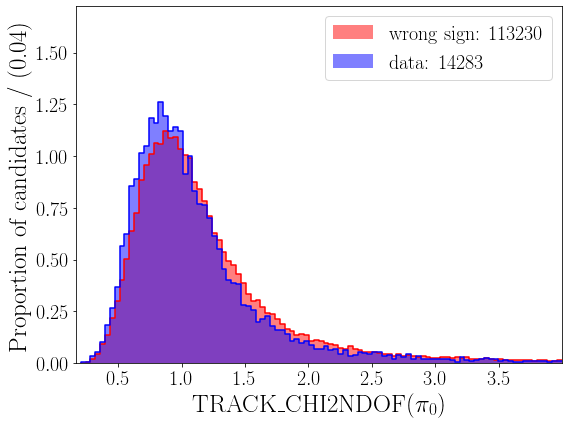

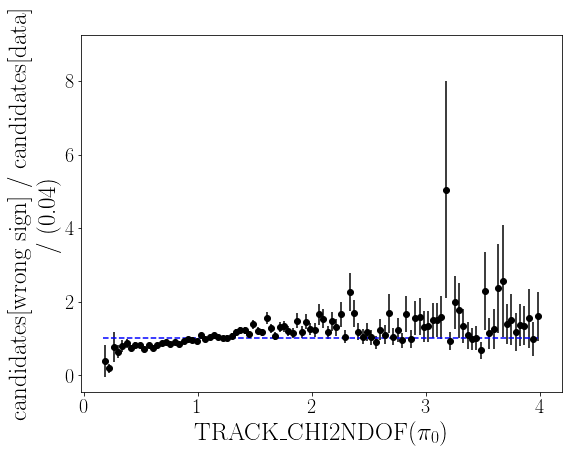

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_pion0_TRACK_CHI2NDOF_wrong_sign_d_data.pdf
=====================  tau_pion1_TRACK_CHI2NDOF =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion1_TRACK_CHI2NDOF_wrong_sign_data.pdf


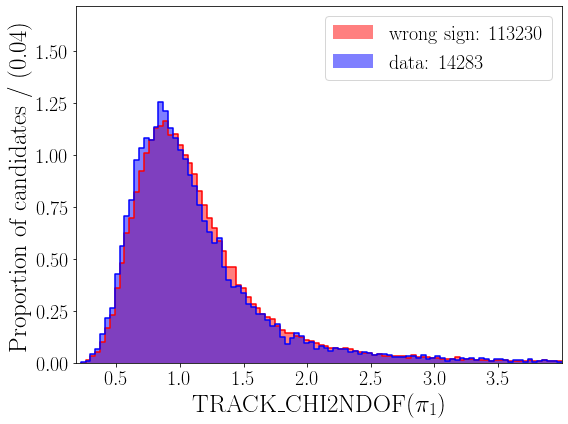

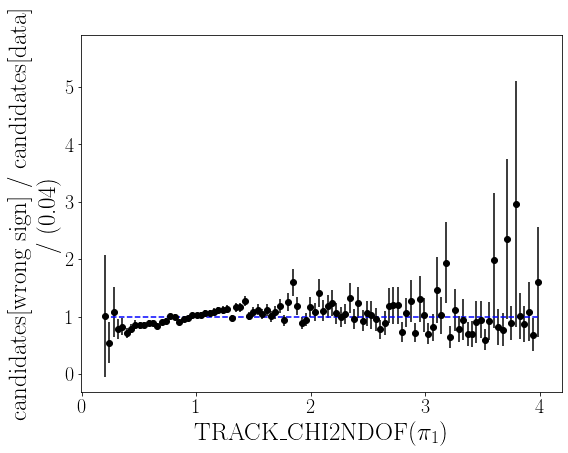

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_pion1_TRACK_CHI2NDOF_wrong_sign_d_data.pdf
=====================  tau_pion2_TRACK_CHI2NDOF =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion2_TRACK_CHI2NDOF_wrong_sign_data.pdf


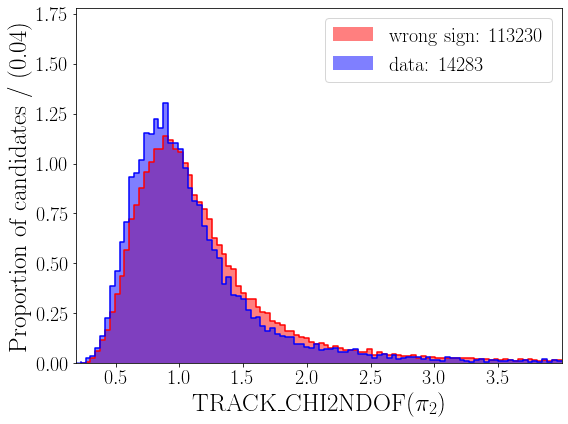

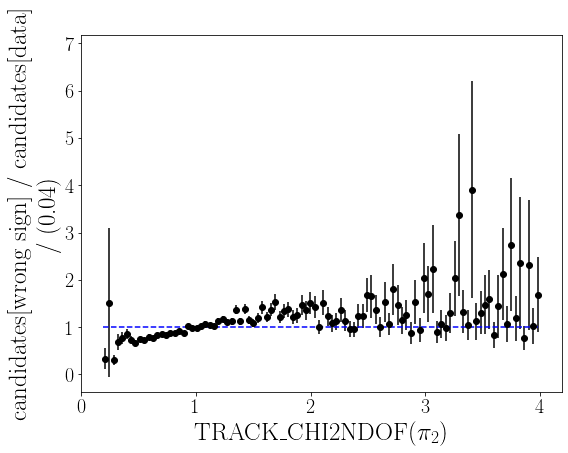

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_data/tau_pion2_TRACK_CHI2NDOF_wrong_sign_d_data.pdf


In [28]:
range_dic={
    'B0_M': [None, 5550],
    'B0_PT': [0,40000],
    'B0_P': [0, 1e6],
    'Dst_PT':[0,30000],
    'Dst_P':[0,4e5],
    'tau_pion0_PT':[0,10000],
    'tau_pion0_P':[0,2e5],
    'tau_pion1_PT':[0,1e4],
    'tau_pion1_P':[0,2e5],    
    'tau_pion2_PT':[0,1e4],
    'tau_pion2_P':[0,2e5], 
    'B0_ENDVERTEX_CHI2':[0,100],
    'Dst_ENDVERTEX_CHI2':[0, 15], 
}

from matplotlib import rc
rc('text', usetex=True)

for variable in variables:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
        
    h.plot_hist_particle({'wrong sign (total)': df['ws_highB0_M'], 'data': df['common_highB0_M']}, variable,
              n_bins=100, mode_hist = True, colors=['r', 'b'], low=low, high=high)
    
    h.plot_divide_particle({'wrong sign (total)': df['ws_highB0_M'], 'data': df['common_highB0_M']}, variable,
              n_bins=100, low=low, high=high)

=====================  B0_M =====================


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


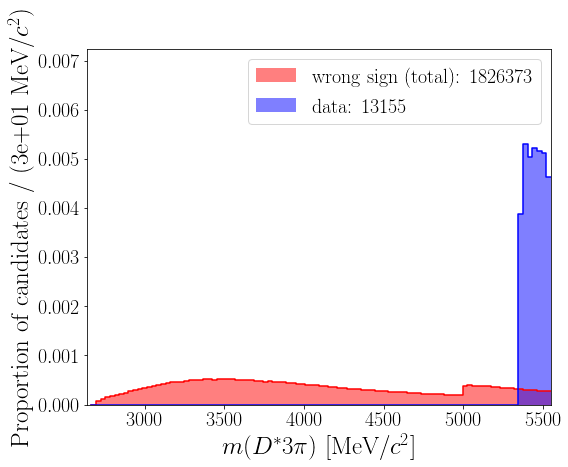

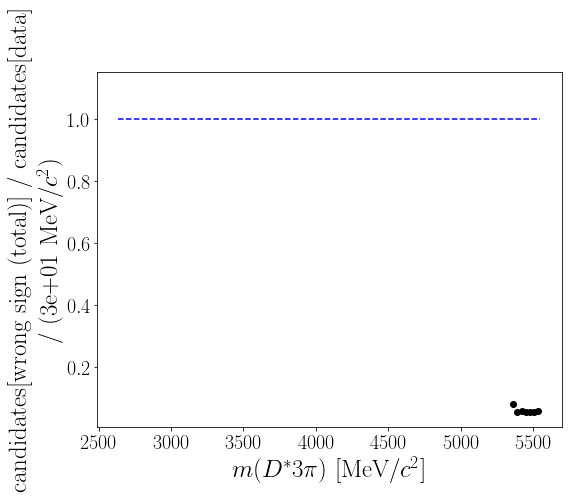

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/B0_M_wrong_sign_(total)_d_data.pdf
=====================  B0_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_P_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


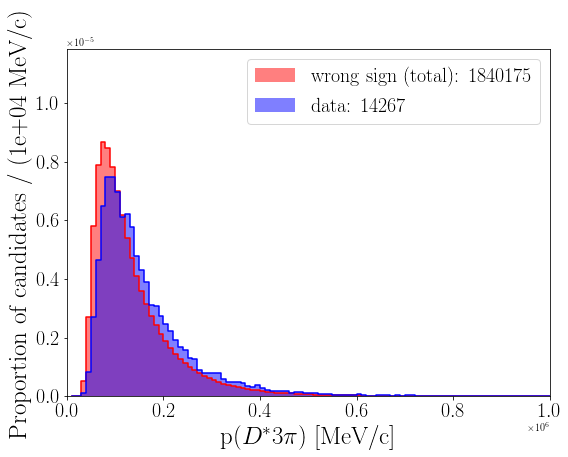

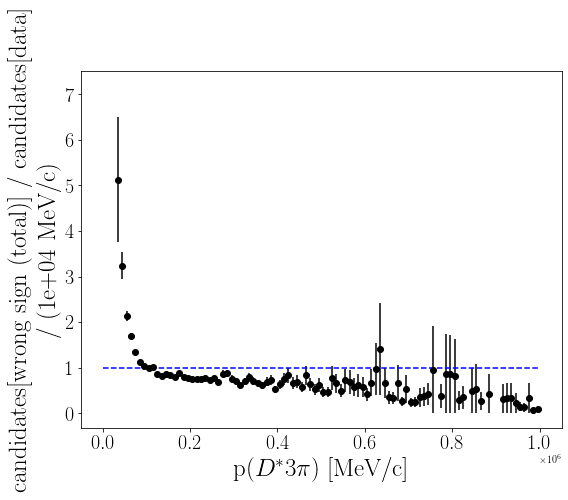

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/B0_P_wrong_sign_(total)_d_data.pdf
=====================  B0_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_PT_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


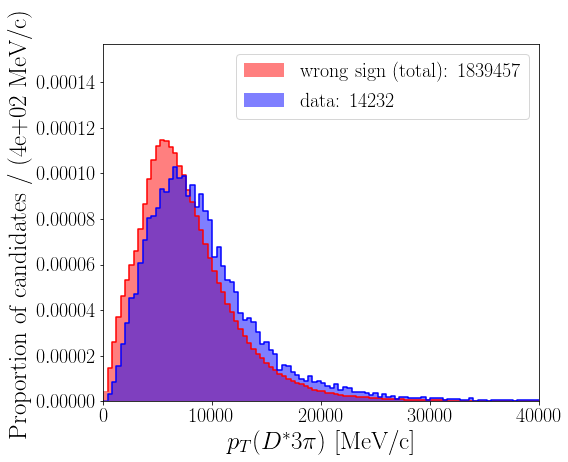

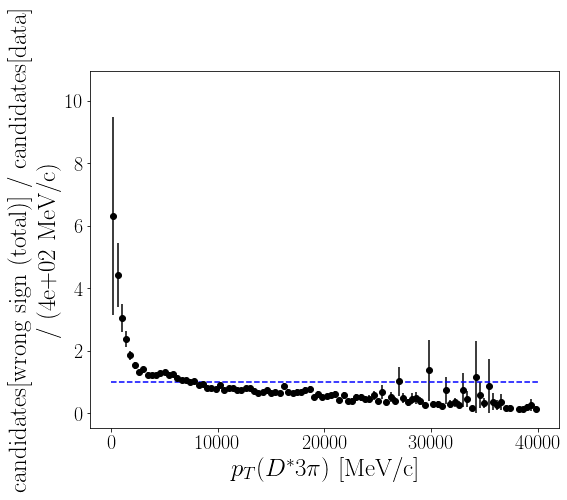

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/B0_PT_wrong_sign_(total)_d_data.pdf
=====================  Dst_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_P_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


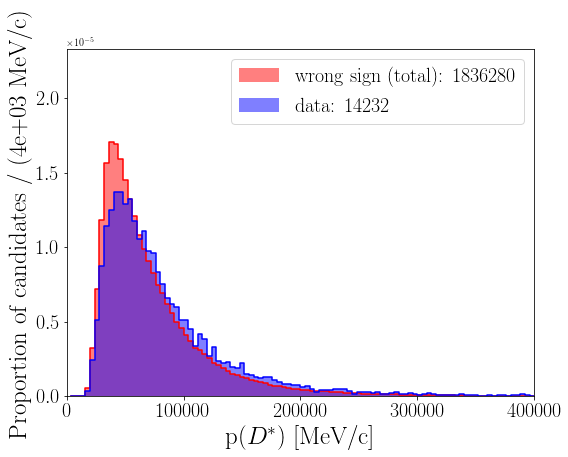

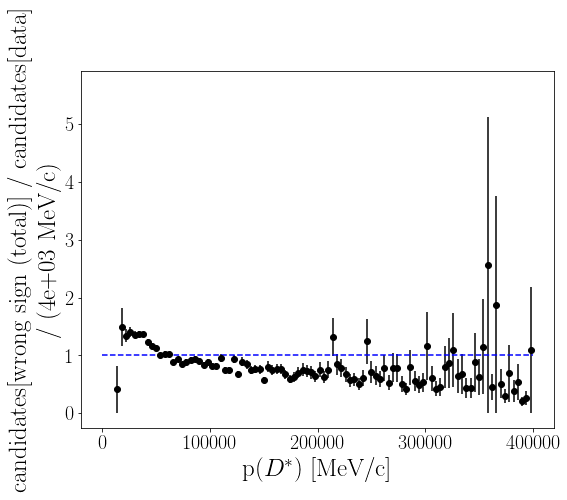

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/Dst_P_wrong_sign_(total)_d_data.pdf
=====================  Dst_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_PT_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


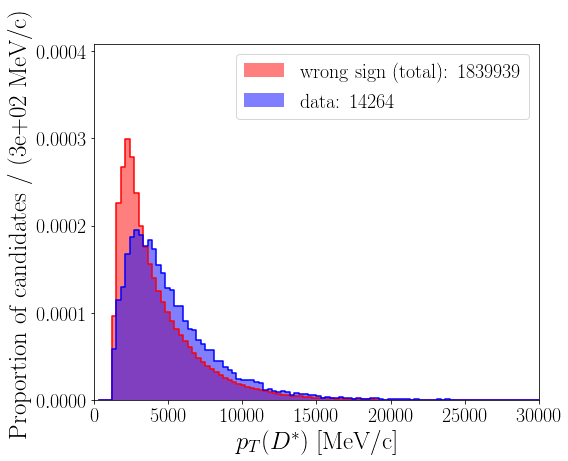

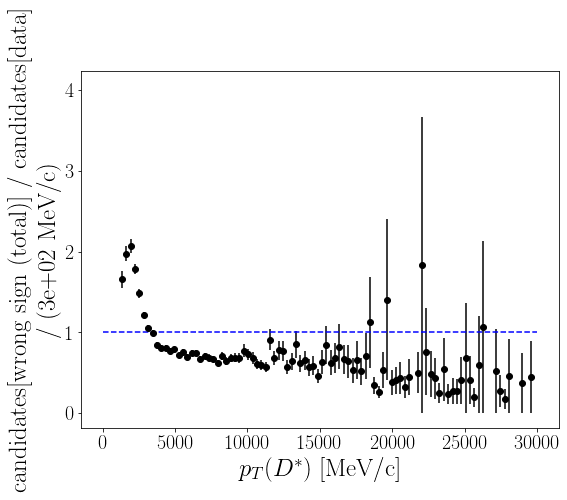

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/Dst_PT_wrong_sign_(total)_d_data.pdf
=====================  tau_pion0_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion0_P_wrong_sign_(total)_data.pdf


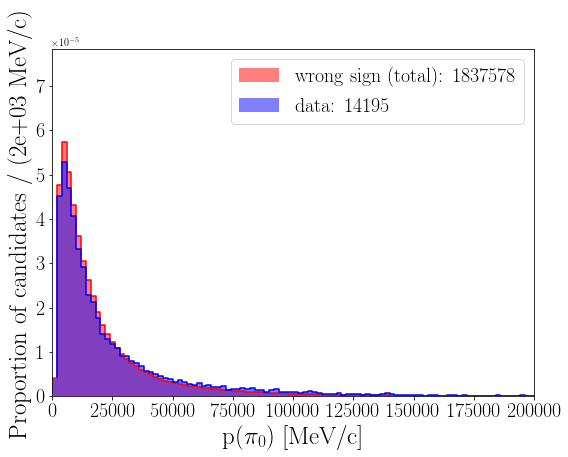

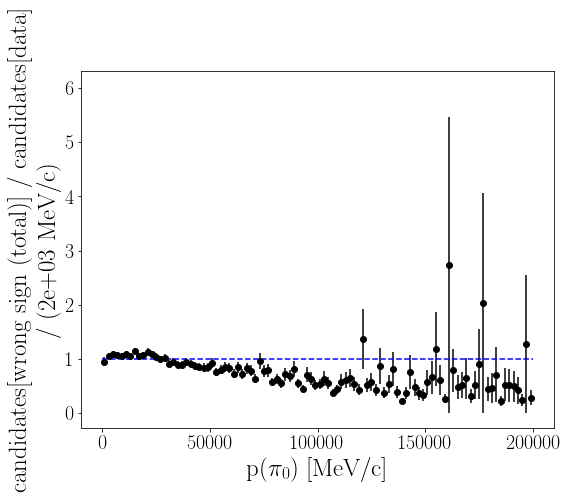

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_pion0_P_wrong_sign_(total)_d_data.pdf
=====================  tau_pion0_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion0_PT_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


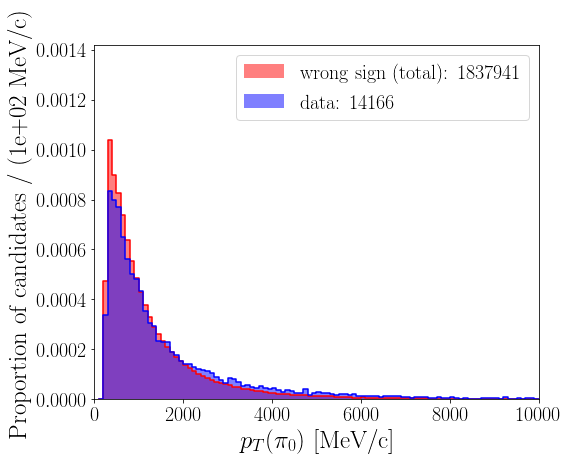

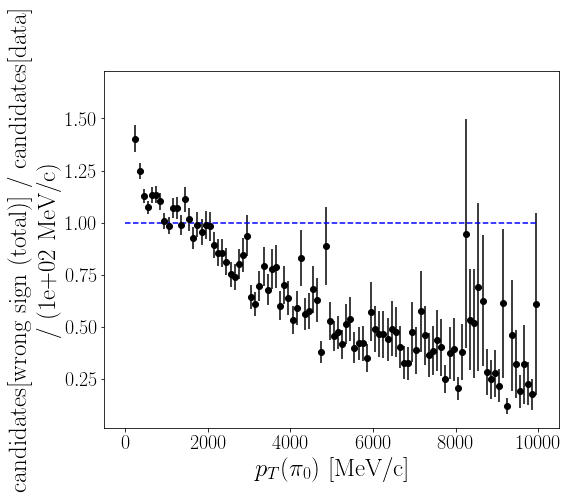

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_pion0_PT_wrong_sign_(total)_d_data.pdf
=====================  tau_pion1_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion1_P_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


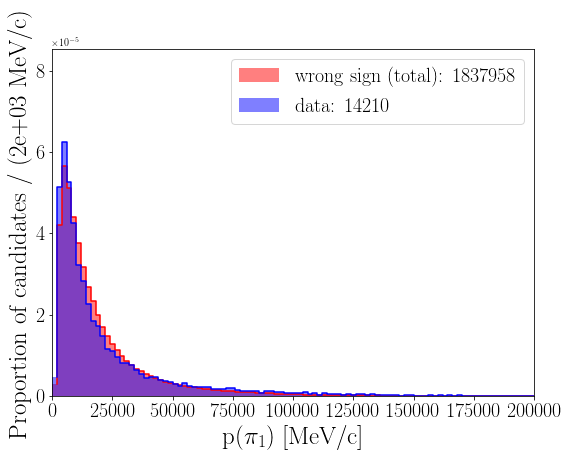

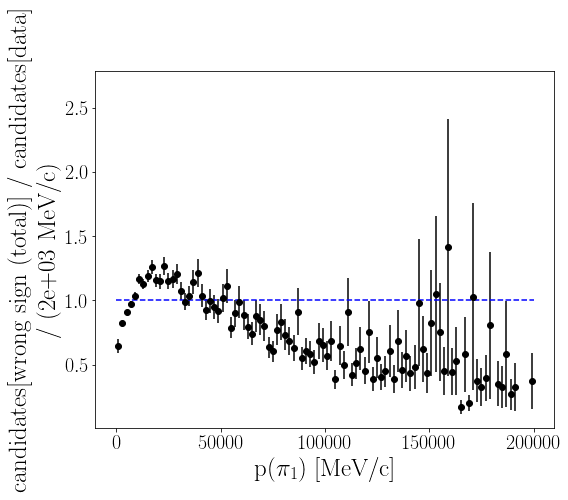

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_pion1_P_wrong_sign_(total)_d_data.pdf
=====================  tau_pion1_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion1_PT_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


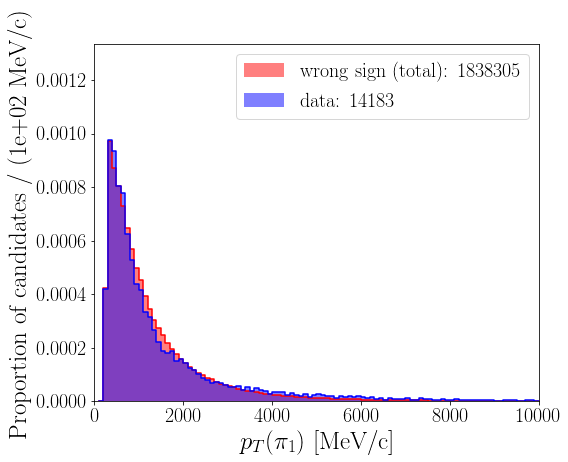

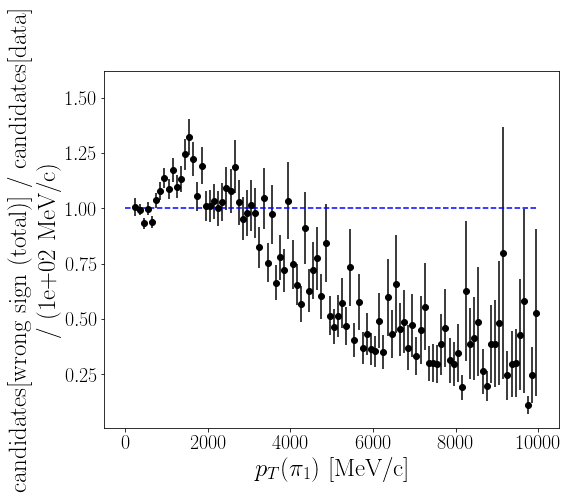

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_pion1_PT_wrong_sign_(total)_d_data.pdf
=====================  tau_pion2_P =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion2_P_wrong_sign_(total)_data.pdf


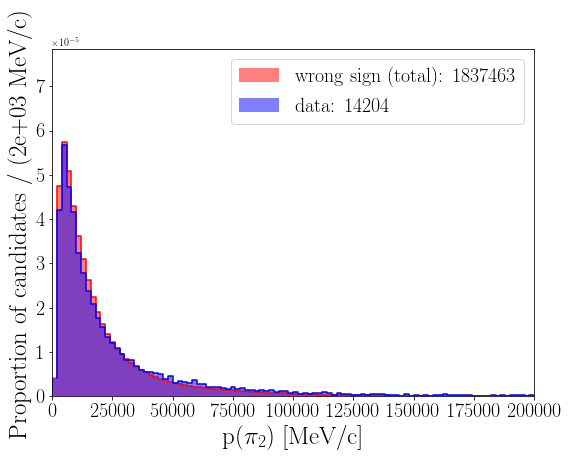

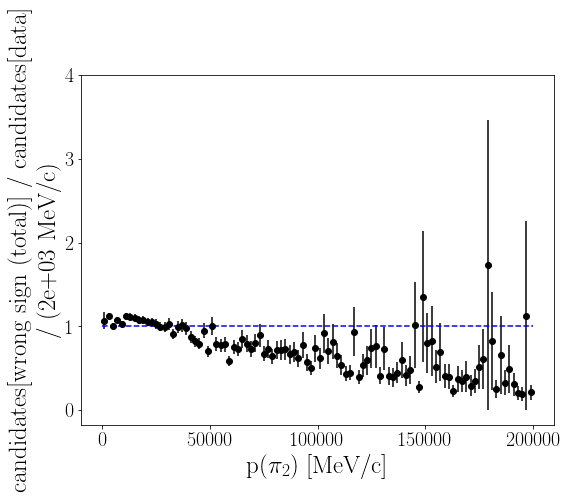

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_pion2_P_wrong_sign_(total)_d_data.pdf
=====================  tau_pion2_PT =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion2_PT_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


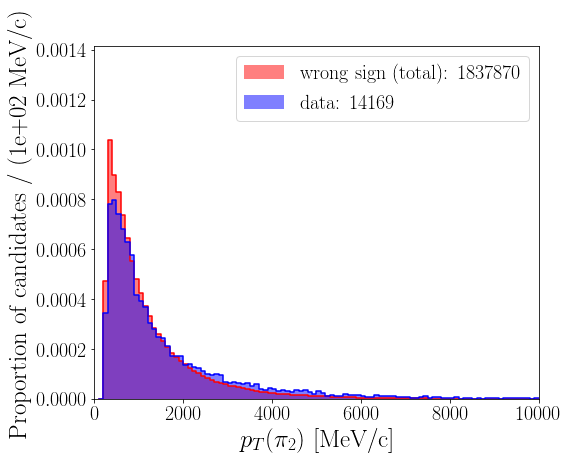

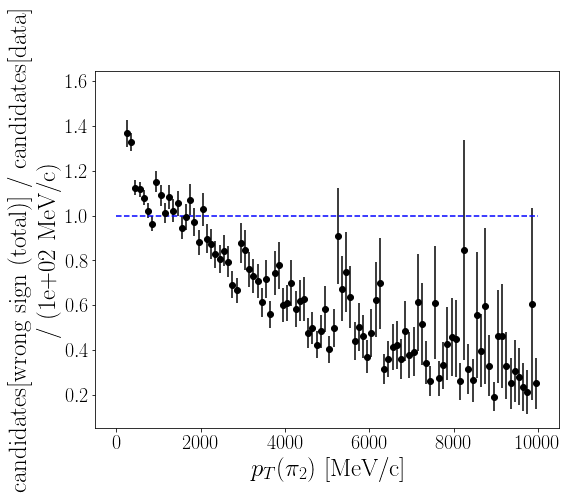

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_pion2_PT_wrong_sign_(total)_d_data.pdf
=====================  B0_ENDVERTEX_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_ENDVERTEX_CHI2_wrong_sign_(total)_data.pdf


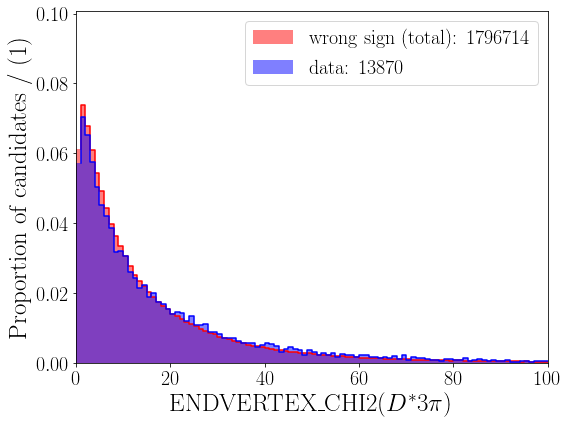

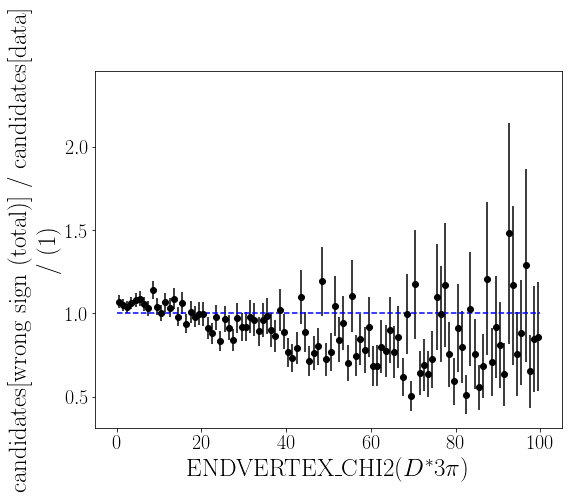

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/B0_ENDVERTEX_CHI2_wrong_sign_(total)_d_data.pdf
=====================  Dst_ENDVERTEX_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_ENDVERTEX_CHI2_wrong_sign_(total)_data.pdf


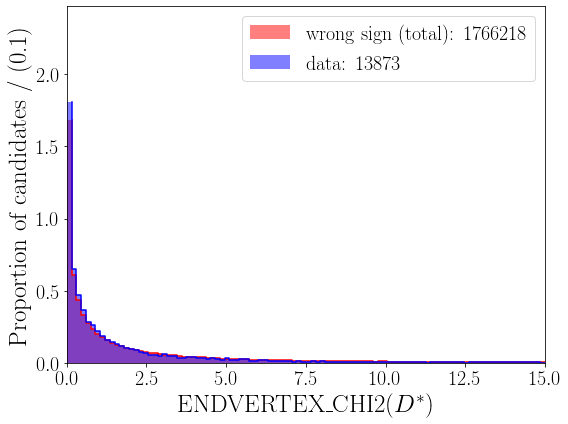

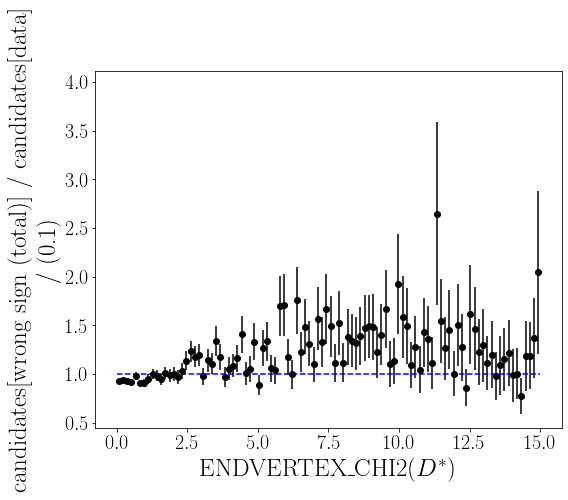

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/Dst_ENDVERTEX_CHI2_wrong_sign_(total)_d_data.pdf
=====================  tau_ENDVERTEX_CHI2 =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_ENDVERTEX_CHI2_wrong_sign_(total)_data.pdf


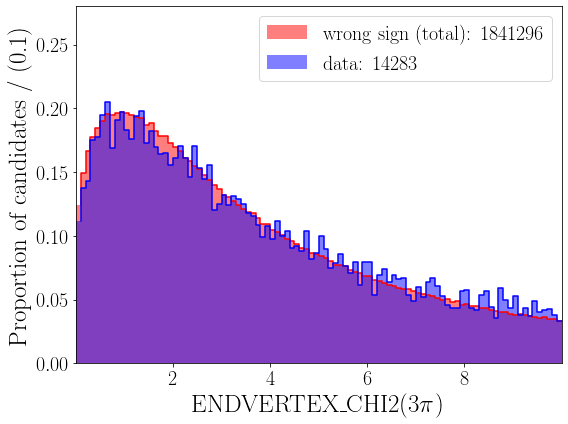

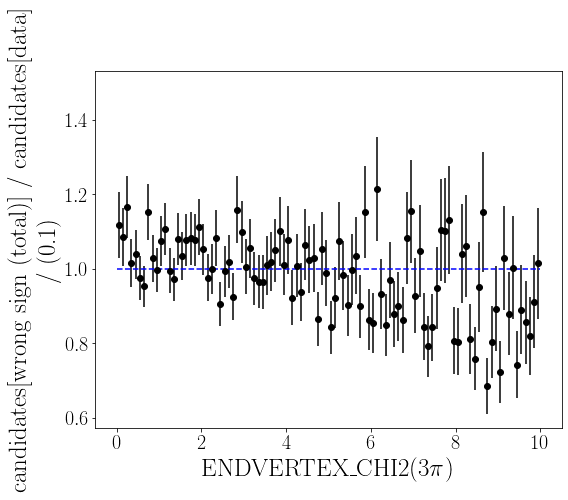

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_ENDVERTEX_CHI2_wrong_sign_(total)_d_data.pdf
=====================  tau_pion0_TRACK_CHI2NDOF =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion0_TRACK_CHI2NDOF_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


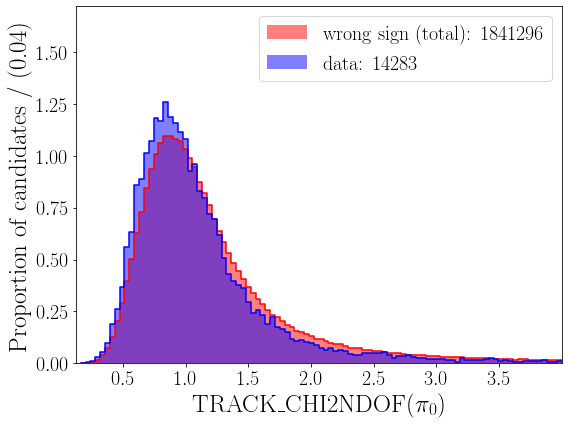

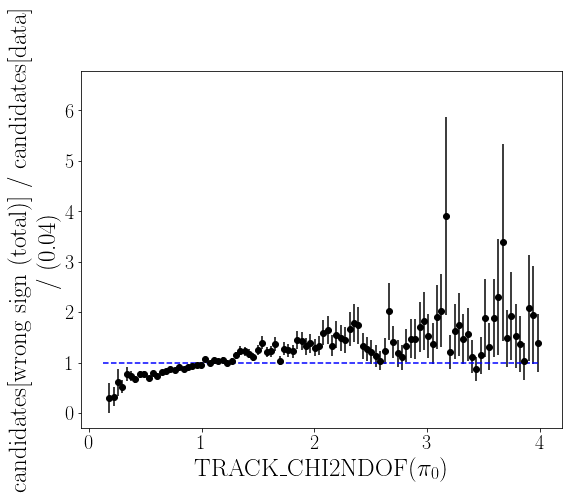

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_pion0_TRACK_CHI2NDOF_wrong_sign_(total)_d_data.pdf
=====================  tau_pion1_TRACK_CHI2NDOF =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion1_TRACK_CHI2NDOF_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


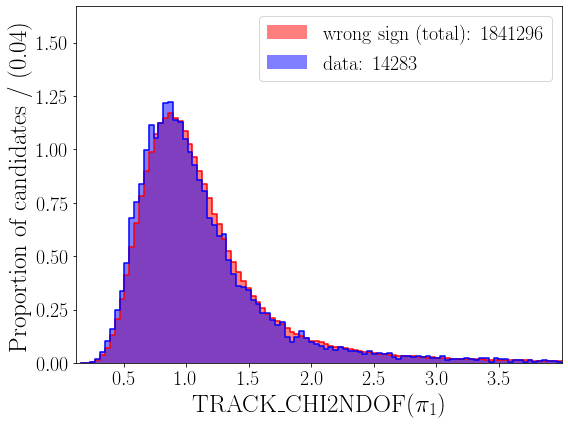

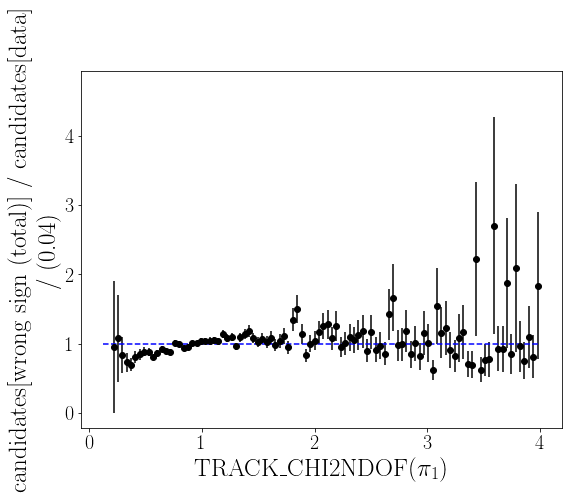

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_pion1_TRACK_CHI2NDOF_wrong_sign_(total)_d_data.pdf
=====================  tau_pion2_TRACK_CHI2NDOF =====================
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_pion2_TRACK_CHI2NDOF_wrong_sign_(total)_data.pdf


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/histogram.py:294: RuntimeWarning: invalid value encountered in true_divide
  err = division*np.sqrt((err1/counts1)**2+(err2/counts2)**2)


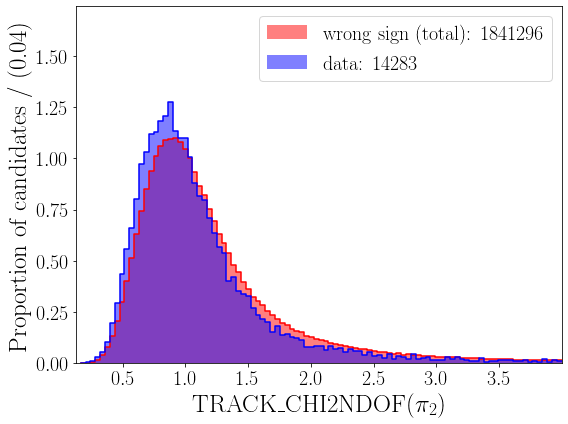

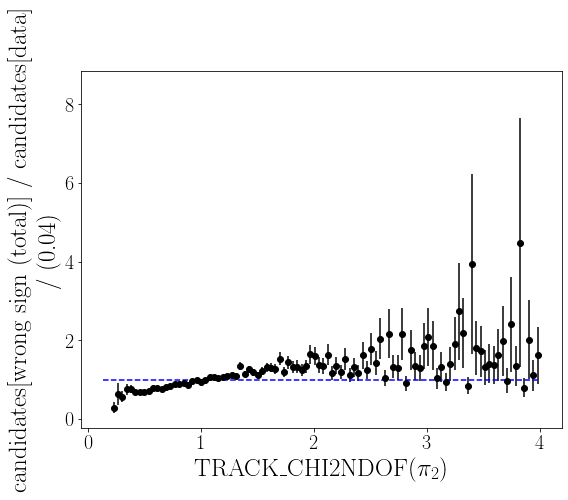

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/wrong_sign_(total)_data/tau_pion2_TRACK_CHI2NDOF_wrong_sign_(total)_d_data.pdf


In [15]:
range_dic={
    'B0_M': [None, 5550],
    'B0_PT': [0,40000],
    'B0_P': [0, 1e6],
    'Dst_PT':[0,30000],
    'Dst_P':[0,4e5],
    'tau_pion0_PT':[0,10000],
    'tau_pion0_P':[0,2e5],
    'tau_pion1_PT':[0,1e4],
    'tau_pion1_P':[0,2e5],    
    'tau_pion2_PT':[0,1e4],
    'tau_pion2_P':[0,2e5], 
    'B0_ENDVERTEX_CHI2':[0,100],
    'Dst_ENDVERTEX_CHI2':[0, 15], 
}

from matplotlib import rc
rc('text', usetex=True)

for variable in variables:
    print(f"=====================  {variable} =====================")
    
    if variable in range_dic:
        low = range_dic[variable][0]
        high = range_dic[variable][1]
    else:
        low = None
        high = None
        
    h.plot_hist_particle({'wrong sign (total)': df['ws'], 'data': df['common_highB0_M']}, variable,
              n_bins=100, mode_hist = True, colors=['r', 'b'], low=low, high=high)
    
    h.plot_divide_particle({'wrong sign (total)': df['ws'], 'data': df['common_highB0_M']}, variable,
              n_bins=100, low=low, high=high)